The notebook is based on https://github.com/epfml/OptML_course/blob/master/labs/ex01/npprimer.ipynb

# Numpy basics reminder

Welcome to the jupyter notebook! To run any cell, press `Shift+Enter` or `Ctrl+Enter`.

**IMPORTANT** : Please have a look at `Help->User Interface Tour` and `Help->Keyboard Shortcuts` in the toolbar above that will help you get started.

In [ ]:
# Useful starting lines
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="talk", font_scale=1.3)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
# Check the Python version
import sys
if sys.version.startswith("3."):
  print("You are running Python 3. Good job :)")
else:
  print("This notebook requires Python 3.\nIf you are using Google Colab, go to Runtime > Change runtime type and choose Python 3.")


You are running Python 3. Good job :)


# Notebook Basics

A cell contains any type of python inputs (expression, function definitions, etc...). Running a cell is equivalent to input this block in the python interpreter. The notebook will print the output of the last executed line.

In [ ]:
1

1

In [ ]:
x = [2,3,4]

def my_function(l):
    l.append(12)

In [ ]:
my_function(x)

x

[2, 3, 4, 12]

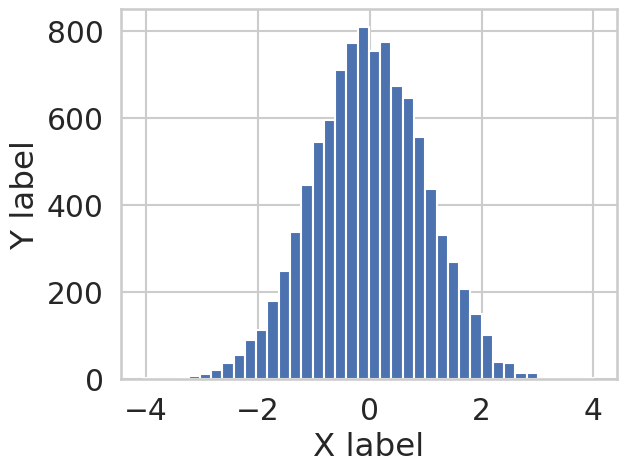

In [ ]:
# Matplotlib is used for plotting, plots are directly embedded in the
# notebook thanks to the '%matplolib inline' command at the beginning
plt.hist(np.random.randn(10000), bins=40)
plt.xlabel('X label')
plt.ylabel('Y label');

Numpy Basics
============

**IMPORTANT** : the numpy documentation is quite good. The Notebook system is really good to help you. Use the Auto-Completion with `Tab`, and use `Shift+Tab` to get the complete documentation about the current function (when the cursor is between the parenthesis of the function for instance).

For example, you want to multiply two arrays. `np.mul` + `Tab` complete to the only valid function `np.multiply`. Then using `Shift+Tab` you learn `np.multiply` is actually the element-wise multiplication and is equivalent to the `*` operator.

In [ ]:
np.multiply

<ufunc 'multiply'>

### Creation of arrays

Creating ndarrays (`np.zeros`, `np.ones`) is done by giving the shape as an iterable (List or Tuple). An integer is also accepted for one-dimensional array.

`np.eye` creates an identity matrix.

You can also create an array by giving iterables to it.

(NB : The random functions `np.random.rand` and `np.random.randn` are exceptions though)

In [ ]:
np.zeros(4)

array([0., 0., 0., 0.])

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
np.array([[1,3,4],[2,5,6]])

array([[1, 3, 4],
       [2, 5, 6]])

In [ ]:
np.arange(10)  # NB : np.array(range(10)) is a slightly more complicated equivalent

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.random.randn(3, 4) # normal distributed values

array([[ 0.23217839,  0.57014875,  1.53739765,  0.39550211],
       [ 1.94966926,  0.845394  , -0.37316151, -1.28790874],
       [ 0.92625393,  0.45382918, -1.32288565, -1.93084219]])

In [ ]:
# 3-D tensor
tensor_3 = np.ones((2, 4, 2))
tensor_3

array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]])

### ndarray basics

A ndarray python object is just a reference to the data location and its characteristics.

All numpy operations applying on an array can be called np._function_(a) or a._function_() (i.e `np.sum(a)` or `a.sum()`)

It has an attribute `shape` that returns a tuple of the different dimensions of the ndarray. It also has an attribute `dtype` that describes the type of data of the object (default type is `float64`)

**WARNING** because of the object structure, unless you call `copy()` copying the reference is not copying the data.

In [ ]:
tensor_3.shape, tensor_3.dtype

((2, 4, 2), dtype('float64'))

In [ ]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = np.array([[4, 3], [2, 1]])
(b.dtype, a.dtype) # each array has a data type (casting rules apply for int -> float)

(dtype('int64'), dtype('float64'))

In [ ]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = a  # Copying the reference only
b[0,0] = 3
a

array([[3., 2.],
       [5., 4.]])

In [ ]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = a.copy()  # Deep-copy of the data
b[0,0] = 3
a

array([[1., 2.],
       [5., 4.]])

#### Basic operators are working element-wise (+, -, *, /)

When trying to apply operators for arrays with different sizes, they are very specific rules that you might want to understand in the future : http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [ ]:
np.ones((2, 4)) * np.random.randn(2, 4)

array([[ 1.77777891, -1.07392524,  0.81852659, -0.38365316],
       [-0.52606018,  0.12271755,  0.64970149,  0.10699783]])

In [ ]:
np.eye(3) - np.ones((3,3))

array([[ 0., -1., -1.],
       [-1.,  0., -1.],
       [-1., -1.,  0.]])

In [ ]:
print(a)
print(a.shape)  # Get shape
print(a.shape[0])  # Get size of first dimension

[[1. 2.]
 [5. 4.]]
(2, 2)
2


#### Accessing elements and slicing

For people uncomfortable with the slicing of arrays, please have a look at the 'Indexing and Slicing' section of http://www.python-course.eu/numpy.php

In [ ]:
print(a[0])  # Get first line (slice for the first dimension)
print(a[:, 1])  # Get second column (slice for the second dimension)
print(a[0, 1])  # Get first line second column element

[1. 2.]
[2. 4.]
2.0


#### Changing the shape of arrays

`ravel` creates a flattened view of an array (1-D representation) whereas `flatten` creates flattened copy of the array.

`reshape` allows in-place modification of the shape of the data. `transpose` shuffles the dimensions.

`np.newaxis` allows the creation of empty dimensions.

In [ ]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = np.array([[4, 3], [2, 1]])
v = np.array([0.5, 2.0])

In [ ]:
print(a)
print(a.T)  # Equivalent : a.tranpose(), np.transpose(a)
print(a.ravel())

[[1. 2.]
 [5. 4.]]
[[1. 5.]
 [2. 4.]]
[1. 2. 5. 4.]


In [ ]:
c = np.random.randn(4,5)
print(c.shape)
print(c[np.newaxis].shape)  # Adding a dimension
print(c.T.shape)
print(c.reshape([10,2]).shape)
print(c)
print(c.reshape([10,2]))

(4, 5)
(1, 4, 5)
(5, 4)
(10, 2)
[[-0.3237524   0.26931115 -0.06836028  0.37889215 -0.39131658]
 [ 1.04605331 -0.81127631  0.30937256  0.56863453  0.12373491]
 [-0.90996891  0.73906796  0.56264109  1.888955   -0.42393041]
 [ 1.26624253 -1.03793986 -0.27496713 -1.57742676  0.44607327]]
[[-0.3237524   0.26931115]
 [-0.06836028  0.37889215]
 [-0.39131658  1.04605331]
 [-0.81127631  0.30937256]
 [ 0.56863453  0.12373491]
 [-0.90996891  0.73906796]
 [ 0.56264109  1.888955  ]
 [-0.42393041  1.26624253]
 [-1.03793986 -0.27496713]
 [-1.57742676  0.44607327]]


In [ ]:
a.reshape((-1, 1)) # a[-1] means 'whatever needs to go there'

array([[1.],
       [2.],
       [5.],
       [4.]])

#### Reduction operations

Reduction operations (`np.sum`, `np.max`, `np.min`, `np.std`) work on the flattened ndarray by default. You can specify the reduction axis as an argument

In [ ]:
np.sum(a), np.sum(a, axis=0), np.sum(a, axis=1) # reduce-operations reduce the whole array if no axis is specified

(12.0, array([6., 6.]), array([3., 9.]))

#### Linear-algebra operations

In [ ]:
np.dot(a, b) # matrix multiplication

array([[ 8.,  5.],
       [28., 19.]])

In [ ]:
# Other ways of writing matrix multiplication, the '@' operator for matrix multiplication
# was introduced in Python 3.5
np.allclose(a.dot(b), a @ b)

True

In [ ]:
# For other linear algebra operations, use the np.linalg module
np.linalg.eig(a)  # Eigen-decomposition

(array([-1.,  6.]),
 array([[-0.70710678, -0.37139068],
        [ 0.70710678, -0.92847669]]))

In [ ]:
print(np.linalg.inv(a))  # Inverse
np.allclose(np.linalg.inv(a) @ a, np.identity(a.shape[1]))  # a^-1 * a = Id

[[-0.66666667  0.33333333]
 [ 0.83333333 -0.16666667]]


True

In [ ]:
np.linalg.solve(a, v) # solves ax = v

array([0.33333333, 0.08333333])

#### Grouping operations

Grouping operations (`np.stack`, `np.hstack`, `np.vstack`, `np.concatenate`) take an iterable of ndarrays and not ndarrays as separate arguments : np.concatenate([a,b]) and not np.concatenate(a,b).

In [ ]:
np.hstack([a, b])

array([[1., 2., 4., 3.],
       [5., 4., 2., 1.]])

In [ ]:
np.vstack([a, b])

array([[1., 2.],
       [5., 4.],
       [4., 3.],
       [2., 1.]])

In [ ]:
np.vstack([a, b]) + v # broadcasting

array([[1.5, 4. ],
       [5.5, 6. ],
       [4.5, 5. ],
       [2.5, 3. ]])

In [ ]:
np.hstack([a, b]) + v # does not work

ValueError: ignored

In [ ]:
np.hstack([a, b]) + v.T # transposing a 1-D array achieves nothing

ValueError: ignored

In [ ]:
np.hstack([a, b]) + v.reshape((-1, 1)) # reshaping to convert v from a (2,) vector to a (2,1) matrix

array([[1.5, 2.5, 4.5, 3.5],
       [7. , 6. , 4. , 3. ]])

In [ ]:
np.hstack([a, b]) + v[:, np.newaxis] # equivalently, we can add an axis

array([[1.5, 2.5, 4.5, 3.5],
       [7. , 6. , 4. , 3. ]])

## Working on subset of the elements

We have two ways in order to apply operations on subparts of arrays (besides slicing).

#### Slicing reminders

In [ ]:
r = np.random.randint(0, 10, size=(3, 4))

In [ ]:
r

array([[8, 4, 8, 0],
       [1, 3, 6, 7],
       [8, 4, 6, 6]])

In [ ]:
r[0], r[1]

(array([8, 4, 8, 0]), array([1, 3, 6, 7]))

In [ ]:
r[0:2]

array([[8, 4, 8, 0],
       [1, 3, 6, 7]])

In [ ]:
r[1][2] # regular python

6

In [ ]:
r[1, 2] # numpy

6

In [ ]:
r[:, 1:3]

array([[4, 8],
       [3, 6],
       [4, 6]])

#### Binary masks

Using logical operations on arrays give a binary mask. Using a binary mask as indexing acts as a filter and outputs just the very elements where the value is True. This gives a memoryview of the array that can get modified.

In [ ]:
r > 5  # Binary element-wise result

array([[ True, False,  True, False],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [ ]:
r[r > 5]  # Use the binary mask as filter

array([8, 8, 6, 7, 8, 6, 6])

In [ ]:
r[r > 5] = 999  # Modify the corresponding values with a constant

In [ ]:
r

array([[999,   4, 999,   0],
       [  1,   3, 999, 999],
       [999,   4, 999, 999]])

#### Working with indices

The second way to work on subpart of arrays are through indices. Usually you'd use one array per dimension with matching indices.

**WARNING** : indices are usually slower than binary masks because it is harder to be parallelized by the underlying BLAS library.

In [ ]:
# Get the indices where the condition is true, gives a tuple whose length
# is the number of dimensions of the input array
np.where(r == 999)

(array([0, 0, 1, 1, 2, 2, 2]), array([0, 2, 2, 3, 0, 2, 3]))

In [ ]:
print(np.where(np.arange(10) < 5))  # Is a 1-tuple
np.where(np.arange(10) < 5)[0]  # Accessing the first element gives the indices array

(array([0, 1, 2, 3, 4]),)


array([0, 1, 2, 3, 4])

In [ ]:
np.where(r == 999, -10, r+1000)  # Ternary condition, if True take element from first array, otherwise from second

array([[ -10, 1004,  -10, 1000],
       [1001, 1003,  -10,  -10],
       [ -10, 1004,  -10,  -10]])

In [ ]:
r[(np.array([1,2]), np.array([2,2]))]  # Gets the view corresponding to the indices. NB : iterable of arrays as indexing

array([999, 999])

# Exercises

In [ ]:
import numpy.linalg as la

## Least squares (quadratic function) loss
$$
f(x_1, x_2) = 0.2 x_1^2 + x_2^2
$$

Implement this function and its gradient. What is the minimum of $f(x)$?

In [ ]:
def f_2d(x_1, x_2):
#     your code here
# ==============
  return

In [ ]:
def grad_f_2d(x_1, x_2):
#     your code here
# ==============
  return

Next we visualize this function

In [ ]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
Z = f_2d(X, Y)

<Figure size 1500x1500 with 0 Axes>

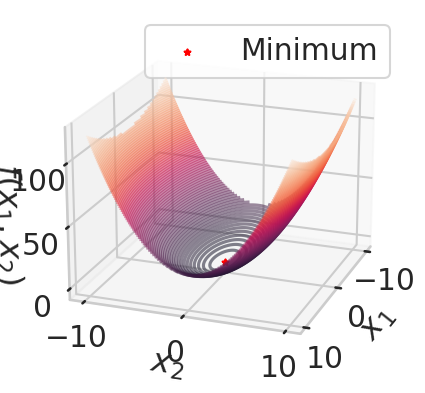

In [ ]:
fig = plt.figure(figsize=(15, 15))

ax = plt.figure().add_subplot(projection='3d')
ax.contour3D(X, Y, Z, 100, alpha=0.5)

ax.scatter(0, 0, f_2d(0, 0), color = 'red', marker ="*", s=20, label="Minimum")
ax.view_init(20, 20)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
plt.legend()
plt.show();

## Multidimensional
$$f(x) := \frac{1}{2}\|Ax - b\|^2,$$

where $A\in\mathbb{R}^{d\times d}$ is a symmetric matrix.


Implement this function and its gradient. What is the minimum of $f(x)$ ?

In [ ]:
# We define the required auxiliary variables

# Problem dimension
d = 10

A_ = np.random.randn(d, d)
A = (A_ + A_.T)/2 # # Enforce symmetricity
b = np.random.randn(d, 1)

x0 = np.random.randn(d, 1)

In [ ]:
def f(x, A, b):
#     your code here
# ==============
  return

### Gradient calculation

In [ ]:
def grad_f(x, A, b):
#     your code here
# ==============
  return

#### Hints

https://en.wikipedia.org/wiki/Matrix_calculus

https://www.matrixcalculus.org/

### Analytic solution

Compute the minimum $x^\star$ of $f(x)$ and norm of the gradient $\|\nabla f(x)\|$ at $x^\star$ and at some random point $x_0$.

#### Hint

$x^\star$ can be obtained from optimality condition: $\nabla f(x^\star) = 0$.

### Your implementation

In [ ]:
# Minimum
x_star = # your code here

In [ ]:
def norm_grad_f(x, A, b):
#     your code here
# ==============
  return

In [ ]:
# Norm of gradient at the optimum.

min_norm = # your code here
print("Gradient norm at the solution:", min_norm)

In [ ]:
# Random point
x_0 = # your code here

In [ ]:
# Norm of gradient at the random point.

norm_0 = # your code here
print("Gradient norm at the solution:", norm_0)

## Excercise

Next generate 1000 random points and display (plot) the sorted (descending) function values in them.

In [4]:
#     your code here

#   ==============

#### Hint

One can use matplotlib's `plt.plot()` function [(Documentation)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for plotting.